# Stack loss demo

The data set was originally published in:
Brownlee, K. A. (1960, 2nd ed. 1965) Statistical Theory and Methodology in Science and Engineering.
New York: Wiley. pp. 491–500.
    

In [1]:
import numpy as np
import pandas as pd
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

We'll start by reading the input file into a data frame:

In [2]:
df = pd.read_csv('stackloss.csv', sep=';')
df

,Id,Air.Flow,Water.Temp,Acid.Conc.,stack.loss
0,1,80,27,89,42
1,2,80,27,88,37
2,3,75,25,90,37
3,4,62,24,87,28
4,5,62,22,87,18
5,6,62,23,87,18
6,7,62,24,93,19
7,8,62,24,93,20
8,9,58,23,87,15
9,10,58,18,80,14


The ID column is dropped from the data frame:

In [3]:
# drop id
df.drop(['Id'], axis=1, inplace=True)

The remaining columns are by default interpreted as integers. Let's convert them to floating point numbers to avoid some warnings in the future:

In [4]:
for col in ['Air.Flow', 'Water.Temp', 'Acid.Conc.', 'stack.loss']:
    df[col] = df[col].astype(dtype = 'float64')
    
df

,Air.Flow,Water.Temp,Acid.Conc.,stack.loss
0,80.0,27.0,89.0,42.0
1,80.0,27.0,88.0,37.0
2,75.0,25.0,90.0,37.0
3,62.0,24.0,87.0,28.0
4,62.0,22.0,87.0,18.0
5,62.0,23.0,87.0,18.0
6,62.0,24.0,93.0,19.0
7,62.0,24.0,93.0,20.0
8,58.0,23.0,87.0,15.0
9,58.0,18.0,80.0,14.0


Let's split the data set into explanatory variables (columns 0 to 2) and a response variable (column 3):

In [5]:
X = df.iloc[:,0:3]
Y = df.iloc[:,3]

Build and train the model, and output model info:

In [6]:
reg = linear_model.LinearRegression()
reg.fit(X,Y)

print("Coefficients:" ,reg.coef_)
print("Intercept:", reg.intercept_)

Coefficients: [ 0.7156402   1.29528612 -0.15212252]
Intercept: -39.91967442012402


Compute predicted values:

In [7]:
Y_pred = reg.predict(X)
Y_pred

array([38.76536277, 38.91748529, 32.444467  , 22.30222583, 19.71165358,
       21.0069397 , 21.38949071, 21.38949071, 18.1443789 , 12.73280592,
       11.36370324, 10.22053964, 12.42856088, 12.05049929,  5.63858164,
        6.0949492 ,  9.51995059,  8.45509295,  9.59825656, 13.58785272,
       22.23771286])

Compute error statistics:

In [8]:
mse = mean_squared_error(Y, Y_pred)
r2s = r2_score(Y, Y_pred) 
print("MSE = ", mse)
print("R2s = ", r2s)

MSE =  8.515712457064694
R2s =  0.9135769044606818


We observe a high r2 score. The model seems to fit the observed data well.

Merge observed and predicted values and compute residuals:

In [9]:
df2 = pd.concat([Y, pd.Series(Y_pred), pd.Series(Y-Y_pred)], axis=1)
df2.columns=['observed','predicted','residual']
print(df2)

    observed  predicted  residual
0       42.0  38.765363  3.234637
1       37.0  38.917485 -1.917485
2       37.0  32.444467  4.555533
3       28.0  22.302226  5.697774
4       18.0  19.711654 -1.711654
5       18.0  21.006940 -3.006940
6       19.0  21.389491 -2.389491
7       20.0  21.389491 -1.389491
8       15.0  18.144379 -3.144379
9       14.0  12.732806  1.267194
10      14.0  11.363703  2.636297
11      13.0  10.220540  2.779460
12      11.0  12.428561 -1.428561
13      12.0  12.050499 -0.050499
14       8.0   5.638582  2.361418
15       7.0   6.094949  0.905051
16       8.0   9.519951 -1.519951
17       8.0   8.455093 -0.455093
18       9.0   9.598257 -0.598257
19      15.0  13.587853  1.412147
20      15.0  22.237713 -7.237713


Plot observed vs predicted values:

<Figure size 640x480 with 0 Axes>

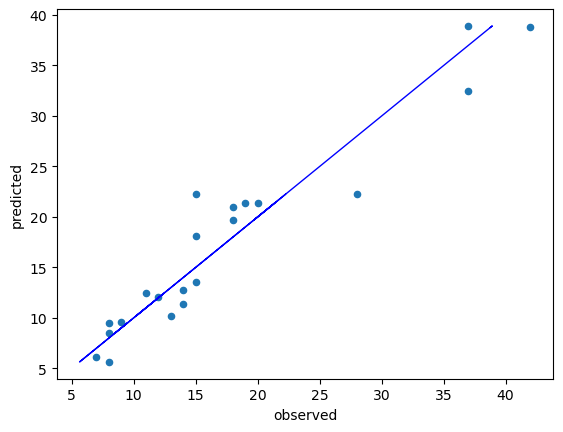

In [10]:
plt.figure()
df2.plot.scatter(x='observed', y='predicted')
plt.plot(Y_pred, Y_pred, color='blue', linewidth=1)
plt.show()

Plot residuals:

<Figure size 640x480 with 0 Axes>

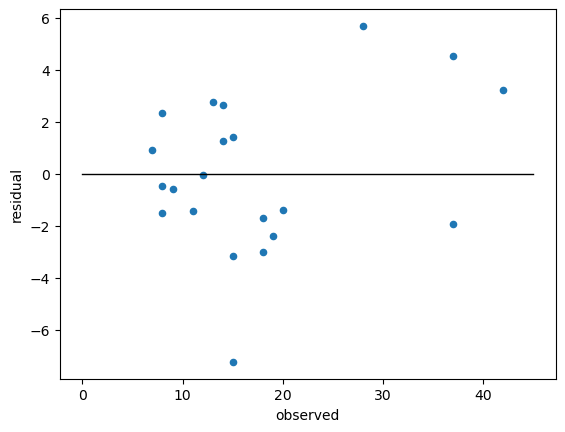

In [11]:
plt.figure()
df2.plot.scatter(x='observed', y='residual')
plt.plot([0,45], [0,0], color='black', linewidth=1)
plt.show()

The residuals seem symmetric, with no obvious change in variance.

Now, normalize variables and rerun MLR analysis to estimate variable importance:

In [12]:
scaler = StandardScaler()
dfn = pd.DataFrame(scaler.fit_transform(df))
print(dfn)
Xn = dfn.iloc[:,0:3]
Yn = dfn.iloc[:,3]
reg2 = linear_model.LinearRegression()
reg2.fit(Xn,Yn)
print("Standardized variables...")
print("Coefficients:" ,reg2.coef_)
print("Intercept:", reg2.intercept_)


           0         1         2         3
0   2.187408  1.914273  0.519040  2.465745
1   2.187408  1.914273  0.327815  1.962043
2   1.628581  1.265890  0.710266  1.962043
3   0.175631  0.941699  0.136590  1.055377
4   0.175631  0.293316  0.136590  0.047972
5   0.175631  0.617508  0.136590  0.047972
6   0.175631  0.941699  1.283942  0.148712
7   0.175631  0.941699  1.283942  0.249453
8  -0.271430  0.617508  0.136590 -0.254250
9  -0.271430 -1.003450 -1.201988 -0.354991
10 -0.271430 -1.003450  0.519040 -0.354991
11 -0.271430 -1.327641  0.327815 -0.455731
12 -0.271430 -1.003450 -0.819538 -0.657212
13 -0.271430 -0.679258  1.283942 -0.556472
14 -1.165553 -1.003450  0.519040 -0.959434
15 -1.165553 -1.003450 -0.054636 -1.060175
16 -1.165553 -0.679258 -2.731792 -0.959434
17 -1.165553 -0.679258 -1.393214 -0.959434
18 -1.165553 -0.355067 -1.201988 -0.858693
19 -0.494961 -0.355067 -0.819538 -0.254250
20  1.069754 -0.355067  0.901491 -0.254250
Standardized variables...
Coefficients: [ 0.64504766  

The first explanatory variable (Air.Flow) seems to the most significant in response to the model.